In [67]:
import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt
from load_datasets import load_dataset

dataset = load_dataset(path='../data/raw/dataset.csv')

# Feature exploration

 ### Feature description
 Unnamed: 0: A numerical label for the rows in the table.  
 Encoder: Indicates the encoder used.  
 Dataset: Specifies the name or identification of the dataset used.  
 Model: Specifies the name of the model used.   
 Tuning: Indicates whether the model was tuned or optimized.  
 Scoring: Specifies the metric used for evaluating the model.   
 CV_Score: Indicates the value of the cross-validation accuracy or ROC-AUC for the model.

In [16]:
dataset.head(10)

,Unnamed: 0,encoder,dataset,model,tuning,scoring,cv_score
0,0,BE,3,DTC,full,ACC,0.908341
1,1,BE,3,DTC,full,AUC,0.906854
2,2,BE,3,DTC,full,F1,0.916533
3,3,BE,3,DTC,model,ACC,0.967145
4,4,BE,3,DTC,model,AUC,0.967233
5,5,BE,3,DTC,model,F1,0.968161
6,6,BE,3,DTC,no,ACC,0.908341
7,7,BE,3,DTC,no,AUC,0.906854
8,8,BE,3,DTC,no,F1,0.916533
9,9,BE,3,KNC,full,ACC,0.781295


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48046 entries, 0 to 48045
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48046 non-null  int64  
 1   encoder     48046 non-null  object 
 2   dataset     48046 non-null  int64  
 3   model       48046 non-null  object 
 4   tuning      48046 non-null  object 
 5   scoring     48046 non-null  object 
 6   cv_score    48046 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.6+ MB


### Feature Analysis: Unnamed: 0 

In [30]:
dataset['Unnamed: 0'].head(20)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
Name: Unnamed: 0, dtype: int64

In [56]:
dataset['Unnamed: 0'].nunique()

48046

Unnamed:0 works as an additional index. 

### Feature Analysis: encoder

In [55]:
print(f"Number of unique values in encoder: {dataset['encoder'].nunique()}")
dataset['encoder'].unique()

Number of unique values in encoder: 32


array(['BE', 'BUCV10RGLMME', 'BUCV10TE', 'BUCV2RGLMME', 'BUCV2TE',
       'BUCV5RGLMME', 'BUCV5TE', 'CBE', 'CE', 'CV10RGLMME', 'CV10TE',
       'CV2RGLMME', 'CV2TE', 'CV5RGLMME', 'CV5TE', 'DE', 'DTEM10',
       'DTEM2', 'DTEM5', 'ME01E', 'ME10E', 'ME1E', 'MHE', 'OE', 'OHE',
       'PBTE0001', 'PBTE001', 'PBTE01', 'RGLMME', 'SE', 'TE', 'WOEE'],
      dtype=object)

 #### Meaning of the abbreviations
 BE: Binary Encoder  
 BUCV10RGLMME: Bayesian Uncertainty Encoder with 10-fold cross-validation and Regularized Generalized Linear Mixed Model Encoding  
 BUCV10TE: Bayesian Uncertainty Encoder with 10-fold cross-validation and Target Encoding
 BUCV2RGLMME: Bayesian Uncertainty Encoder with 2-fold cross-validation and Regularized Generalized Linear Mixed Model Encoding    
 BUCV2TE: Bayesian Uncertainty Encoder with 2-fold cross-validation and Target Encoding  
 BUCV5RGLMME: Bayesian Uncertainty Encoder with 5-fold cross-validation and Regularized Generalized Linear Mixed Model Encoding  
 BUCV5TE: Bayesian Uncertainty Encoder with 5-fold cross-validation and Target Encoding  
 CBE: Count Encoder  
 CE: Category Encoder  
 CV10RGLMME: Cross-validated with 10-fold cross-validation and Regularized Generalized Linear Mixed Model Encoding  
 CV10TE: Cross-validated with 10-fold cross-validation and Target Encoding  
 CV2RGLMME: Cross-validated with 2-fold cross-validation and Regularized Generalized Linear Mixed Model Encoding  
 CV2TE: Cross-validated with 2-fold cross-validation and Target Encoding  
 CV5RGLMME: Cross-validated with 5-fold cross-validation and Regularized Generalized Linear Mixed Model Encoding  
 CV5TE: Cross-validated with 5-fold cross-validation and Target Encoding  
 DE: Drop Encoder  
 DTEM10: Drop Target Encoder with 10-fold cross-validation  
 DTEM2: Drop Target Encoder with 2-fold cross-validation  
 DTEM5: Drop Target Encoder with 5-fold cross-validation  
 ME01E: M-estimator Encoder with 0.1 noise level and encoding  
 ME10E: M-estimator Encoder with 1.0 noise level and encoding  
 ME1E: M-estimator Encoder with 0.01 noise level and encoding  
 MHE: Mean Hash Encoder  
 OE: Ordinal Encoder  
 OHE: One-Hot Encoder  
 PBTE0001: Polynomial-based Target Encoder with degree 0.001  
 PBTE001: Polynomial-based Target Encoder with degree 0.01  
 PBTE01: Polynomial-based Target Encoder with degree 0.1  
 RGLMME: Regularized Generalized Linear Mixed Model Encoding  
 SE: Sum Encoder  
 TE: Target Encoder  
 WOEE: Weight of Evidence Encoder  

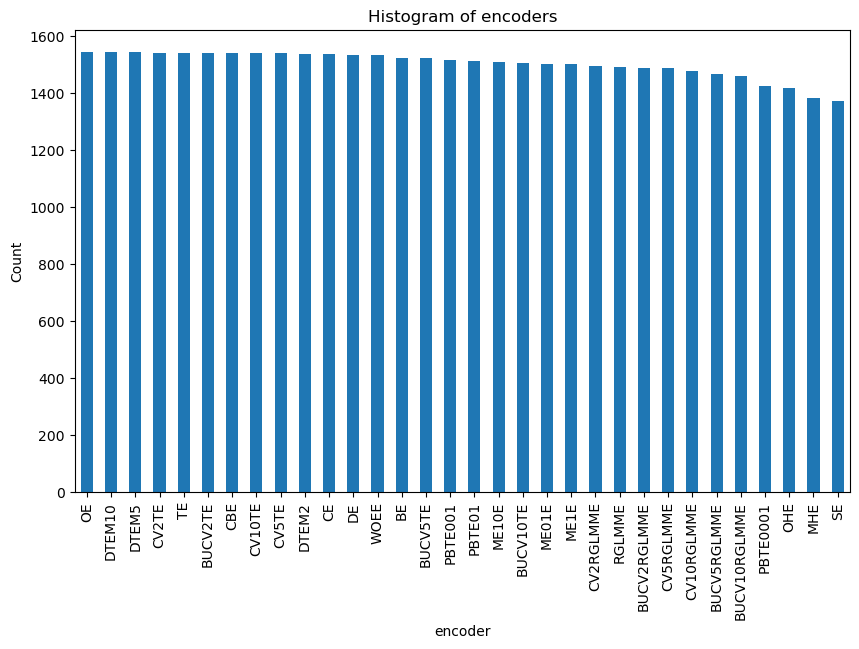

In [71]:

dataset['encoder'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('encoder')
plt.ylabel('Count')
plt.title('Histogram of encoders')
plt.show()

The different encoders are almost equally distributed in the dataset

### Feature Analysis: dataset

In [59]:
print(f"Number of unique values in dataset: {dataset['dataset'].nunique()}")
dataset['dataset'].unique()

Number of unique values in dataset: 50


array([    3,    29,    31,    38,    50,    51,    56,   333,   334,
         451,   470,   881,   956,   959,   981,  1037,  1111,  1112,
        1114,  1169,  1235,  1461,  1463,  1486,  1506,  1511,  1590,
        6332, 23381, 40536, 40945, 40981, 40999, 41005, 41007, 41162,
       41224, 42178, 42343, 42344, 42738, 42750, 43098, 43607, 43890,
       43892, 43896, 43897, 43900, 43922], dtype=int64)

These values represent the different datasets in the dataset column. Each value serves as an identifier for a specific dataset.

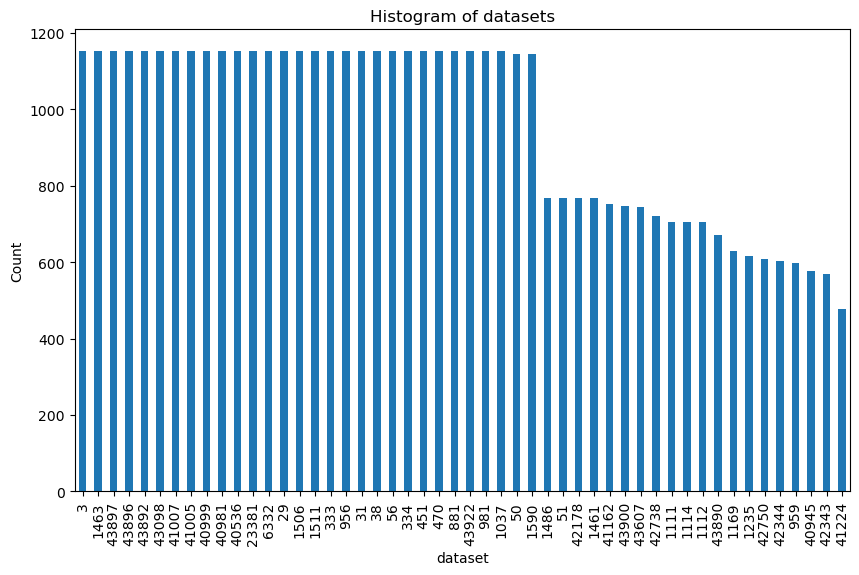

In [72]:
dataset['dataset'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('dataset')
plt.ylabel('Count')
plt.title('Histogram of datasets')
plt.show()

Some datasets occurs much more frequently 

### Feature analysis: model

In [75]:
print(f"Number of unique values in model: {dataset['model'].nunique()}")
dataset['model'].unique()

Number of unique values in model: 5


array(['DTC', 'KNC', 'LGBMC', 'LR', 'SVC'], dtype=object)

#### Meaning of the abbreviations

 DTC: Decision Tree Classifier  
 KNC: K-Nearest Neighbors Classifier  
 LGBMC: LightGBM Classifier  
 LR: Logistic Regression Classifier  
 SVC: Support Vector Classifier  

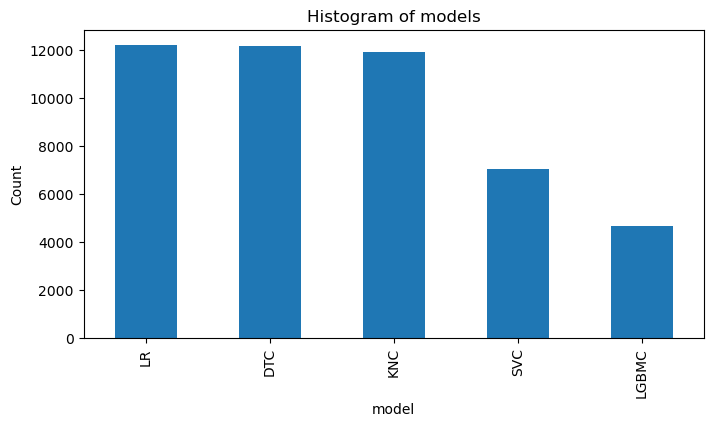

In [77]:
dataset['model'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.xlabel('model')
plt.ylabel('Count')
plt.title('Histogram of models')
plt.show()

### Feature analysis: tuning

In [78]:
print(f"Number of unique values in tuning: {dataset['tuning'].nunique()}")
dataset['tuning'].unique()

Number of unique values in tuning: 3


array(['full', 'model', 'no'], dtype=object)

#### Meaning of the abbreviations

 full: Full tuning of the model. All available parameters of the model were tuned to achieve the best performance.  
 model: Tuning of the model, but not all parameters.  
 no: No tuning or optimization of the model. The model was used with default parameters.  

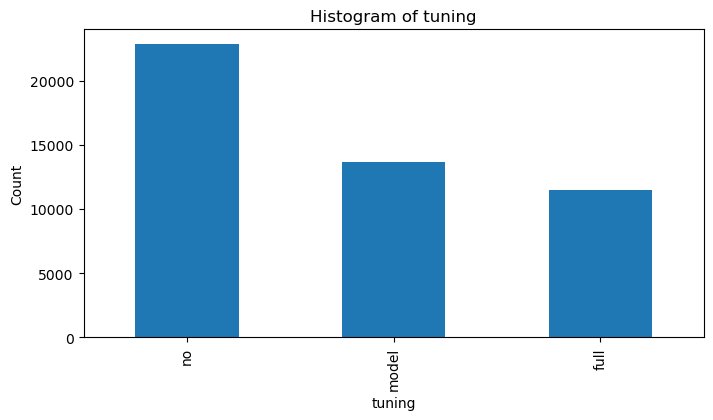

In [79]:
dataset['tuning'].value_counts().plot(kind='bar', figsize=(8, 4))
plt.xlabel('tuning')
plt.ylabel('Count')
plt.title('Histogram of tuning')
plt.show()

In [80]:
dataset['tuning'].value_counts()

no       22857
model    13677
full     11512
Name: tuning, dtype: int64

Half of the models were used without tuning